In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.naive_bayes import GaussianNB

In [2]:
data = np.load('../bases/Titanic.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = data['X_treino'], data['X_teste'], data['y_treino'], data['y_teste'], list(data['feature_names'])

In [5]:
param_bayes = {
    'var_smoothing': Real(1e-9, 1e-1, prior='log-uniform')
}

In [6]:
bayes_search = BayesSearchCV(GaussianNB(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3.303653629394814e-08] before, using random point [9.117920730929486e-08]
  warnings.warn(



Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'var_smoothing': 1.9091131576909445e-06})
Melhor pontuação de validação cruzada: 0.80


In [7]:
best_model_bayes = bayes_search.best_estimator_
previsoes_bayes = best_model_bayes.predict(X_teste)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
accuracy_score(y_teste,previsoes_bayes)

0.7802690582959642

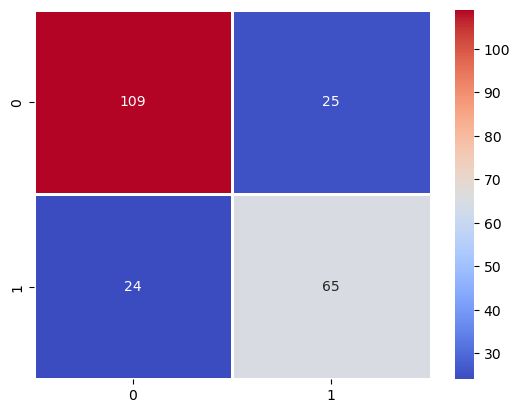

In [10]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

In [11]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       134
           1       0.72      0.73      0.73        89

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



Variáveis mais relevantes:
Sex: 0.19686098654708523
SibSp: 0.030044843049327384
Fare: 0.010313901345291521
Parch: 0.0022421524663677195
Age: -0.002690582959641241
Pclass: -0.012107623318385607


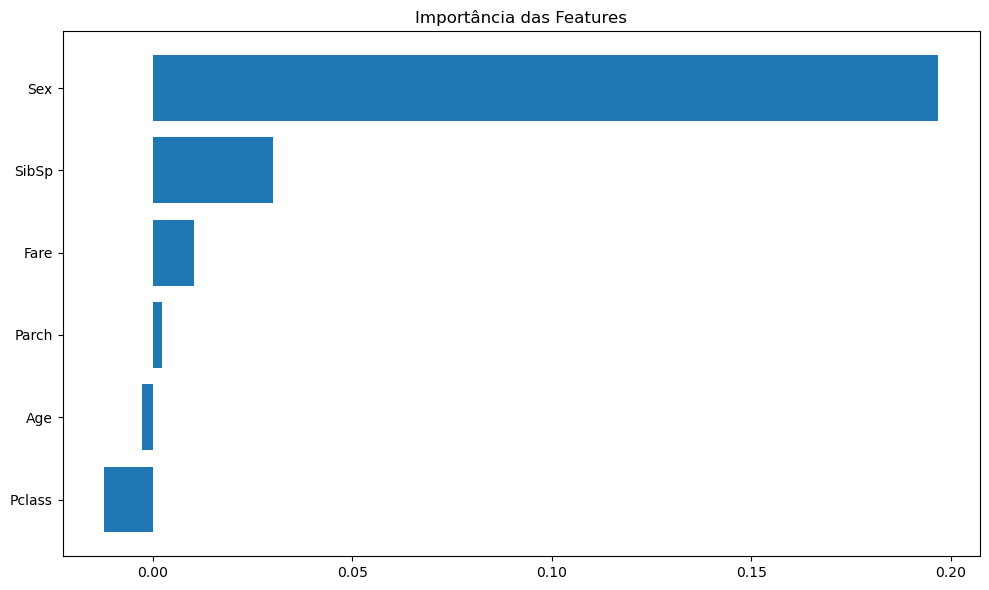

In [13]:
from sklearn.inspection import permutation_importance

# Calcular importância por permutação
result = permutation_importance(best_model_bayes, X_teste, y_teste, n_repeats=10, random_state=42)

# Obter as importâncias médias
importancias = result.importances_mean

# Pegar os nomes das features (ajuste conforme seus dados)
nomes_das_features = feature_names  

# Ordenar as features
indices_ordenados = np.argsort(importancias)[::-1]
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()